# Polynomial Regression on Stock data (Thomson Reuters)
In this project, a time series data is taken as input and a polynomial regression is executed on the dataset to predict the future stock prices.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

## Load and prepare the data

This project works with a small dataset saved into a `.csv` file. Let us load that up and perform required pre-processing if any.

In [2]:
data_path = 'tri.csv'
data = pd.read_csv(data_path)

data.head()

,Date,Open,High,Low,Close,Volume
0,5-Jun-17,44.15,44.24,43.75,43.78,1012521
1,2-Jun-17,43.98,44.37,43.96,44.18,1708180
2,1-Jun-17,43.58,44.00,43.58,43.85,1049762
3,31-May-17,43.93,43.93,43.46,43.66,1022651
4,30-May-17,43.61,43.90,43.56,43.81,818825


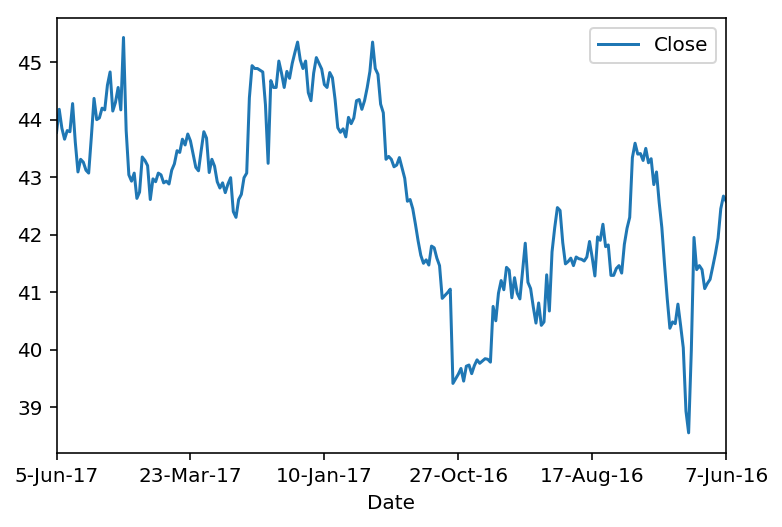

In [3]:
data = data.sort_index()
data.plot(x='Date', y='Close')

In [4]:
updated_data = data.drop(['Open', 'High', 'Low', 'Volume', 'Date'], axis=1)
updated_data['Serial'] = range(len(updated_data) - 1, -1, -1)
updated_data.index = updated_data['Serial']
updated_data = updated_data.drop(['Serial'], axis=1)

## Polynomial Regression with up to 16 degrees
Generally, the more coefficients you take, in other words, the higher the degrees, the more accurate the line fits. With 16 degrees predicted values are rather optimistic as it ends with a peak.

(38, 48)

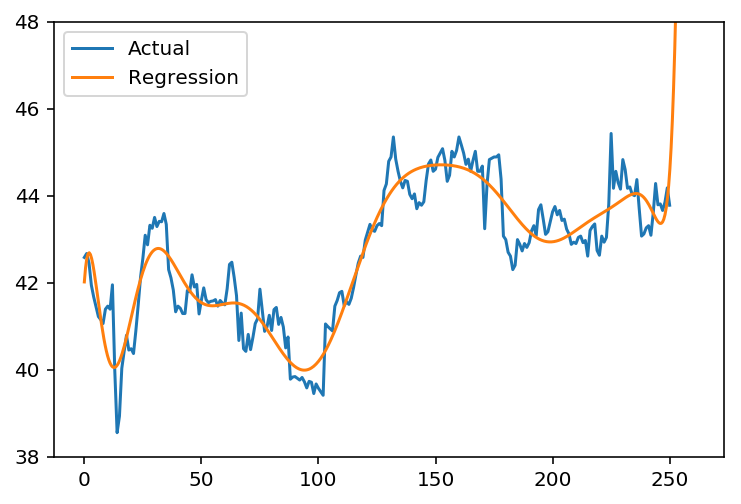

In [5]:
coeffs = np.polyfit(updated_data.index, updated_data['Close'], 16)
x_p = np.linspace(0, 260, 500)
y_p = np.polyval(coeffs, x_p)
mp.plot(updated_data.index, updated_data['Close'])
mp.plot(x_p, y_p)
mp.legend(['Actual', 'Regression'])
mp.ylim(38, 48)

## Polynomial Regression with above 16 degrees
Interestingly, the moment we increase coefficients beyond 16, for this particular dataset, it ends with a sharp decline. Therefore, it is not a predictable strategy.

(38, 48)

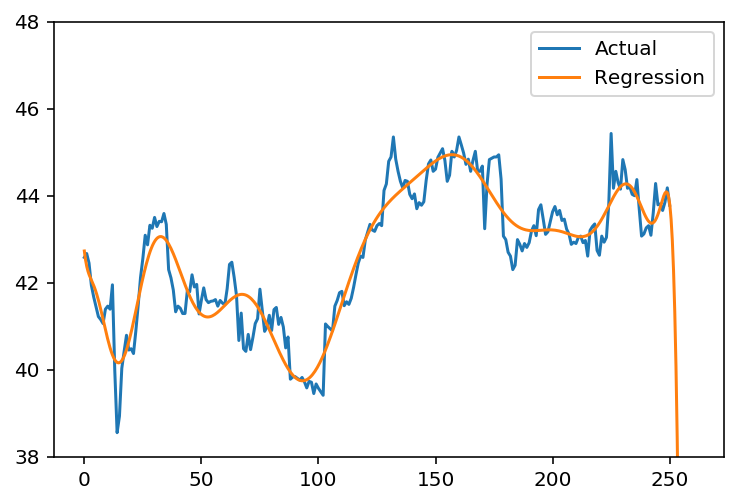

In [6]:
coeffs = np.polyfit(updated_data.index, updated_data['Close'], 17)
x_p = np.linspace(0, 260, 500)
y_p = np.polyval(coeffs, x_p)
mp.plot(updated_data.index, updated_data['Close'])
mp.plot(x_p, y_p)
mp.legend(['Actual', 'Regression'])
mp.ylim(38, 48)

## Conclusion
The question is really, for an unpredictable dataset such as trading, without any help from other external indices and measures, is it really possible to reliably predict future values based on a polynomial regression strategy?

Probably, not.

Looks like it is only good at fitting a line, not so much at finding a trend. However, although it may not be much suitable for extrapolation, it could somewhat be usable in interpolation for filling out missing values in the dataset.